# Importing the necessary libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.api.types import is_datetime64_any_dtype

# Reading the dataset and displaying the top and bottom 5 rows of it.

In [4]:
df=pd.read_csv('youtube_dislike_dataset.csv')
df

,video_id,title,channel_id,channel_title,published_at,view_count,likes,dislikes,comment_count,tags,description,comments
0,--0bCF-iK2E,Jadon Sancho Magical Skills & Goals,UC6UL29enLNe4mqwTfAyeNuw,Bundesliga,2021-07-01 10:00:00,1048888,19515,226,1319,football soccer ftbol alemn Bundesliga season ...,Enjoy the best skills and goals from Jadon San...,"Respect to Dortmund fans,must be sad losing hi..."
1,--14w5SOEUs,Migos - Avalanche (Official Video),UCGIelM2Dj3zza3xyV3pL3WQ,MigosVEVO,2021-06-10 16:00:00,15352638,359277,7479,18729,Migos Avalanche Quality Control Music/Motown R...,"Watch the the official video for Migos - ""Aval...",Migos just makes me want to live my live to th...
2,--40TEbZ9Is,Supporting Actress in a Comedy: 73rd Emmys,UClBKH8yZRcM4AsRjDVEdjMg,Television Academy,2021-09-20 01:03:32,925281,11212,401,831,,Hannah Waddingham wins the Emmy for Supporting...,Hannah's energy bursts through any screen. Wel...
3,--4tfbSyYDE,JO1'YOUNG (JO1 ver.)' PERFORMANCE VIDEO,UCsmXiDP8S40uBeJYxvyulmA,JO1,2021-03-03 10:00:17,2641597,39131,441,3745,PRODUCE101JAPAN JO1 TheSTAR STA...,JO1'YOUNG (JO1 ver.)' PERFORMANCE VIDEO\n\n---...,youngVer>< REN is really PERFECT. It's not ju...
4,--DKkzWVh-E,Why Retaining Walls Collapse,UCMOqf8ab-42UUQIdVoKwjlQ,Practical Engineering,2021-12-07 13:00:00,715724,32887,367,1067,retaining wall New Jersey highway Direct Conne...,One of the most important (and innocuous) part...,Keep up with all my projects here: https://pr...
...,...,...,...,...,...,...,...,...,...,...,...,...
37417,zzd4ydafGR0,Lil Tjay - Calling My Phone (feat. 6LACK) [Off...,UCEB4a5o_6KfjxHwNMnmj54Q,Lil Tjay,2021-02-12 05:03:49,120408275,2180780,35871,81360,Lil Tjay Steady Calling My Phone Calling My Ph...,"Official video for ""Calling My Phone"" by Lil T...",'DESTINED 2 WIN' OUT NOW !! https://liltjay.ln...
37418,zziBybeSAtw,PELICANS at LAKERS | FULL GAME HIGHLIGHTS | Ja...,UCWJ2lWNubArHWmf3FIHbfcQ,NBA,2021-01-16 05:39:05,2841917,20759,1049,2624,NBA G League Basketball game-0022000187 Lakers...,PELICANS at LAKERS | FULL GAME HIGHLIGHTS | Ja...,Montrezl Harrell is going crazy with the rebou...
37419,zzk09ESX7e0,[MV] (MAMAMOO) - Where Are We Now,UCuhAUMLzJxlP1W7mEk0_6lA,MAMAMOO,2021-06-02 09:00:10,13346678,720854,4426,90616,MAMAMOO WAW WAW MAMAMOO WAW Where Are We Now...,[MV] (MAMAMOO) - Where Are We Now\n\nInstagra...,I honestly do not know why this song hit so ha...
37420,zzmQEb0Em5I,FELLIPE ESCUDERO- Master Podcast #12,UC8NjnNWMsRqq11NYvHAQb1g,Master Podcast,2020-10-20 20:59:30,252057,19198,1234,1471,master masterpodcast lord lord vinheteiro z z ...,DOCTOR HAIR\nhttps://www.thedoctorhair.com/?fb...,Foi um prazer passar esta tarde com vocs debat...


In [5]:
df.head()   #Top five rows of the dataset

,video_id,title,channel_id,channel_title,published_at,view_count,likes,dislikes,comment_count,tags,description,comments
0,--0bCF-iK2E,Jadon Sancho Magical Skills & Goals,UC6UL29enLNe4mqwTfAyeNuw,Bundesliga,2021-07-01 10:00:00,1048888,19515,226,1319,football soccer ftbol alemn Bundesliga season ...,Enjoy the best skills and goals from Jadon San...,"Respect to Dortmund fans,must be sad losing hi..."
1,--14w5SOEUs,Migos - Avalanche (Official Video),UCGIelM2Dj3zza3xyV3pL3WQ,MigosVEVO,2021-06-10 16:00:00,15352638,359277,7479,18729,Migos Avalanche Quality Control Music/Motown R...,"Watch the the official video for Migos - ""Aval...",Migos just makes me want to live my live to th...
2,--40TEbZ9Is,Supporting Actress in a Comedy: 73rd Emmys,UClBKH8yZRcM4AsRjDVEdjMg,Television Academy,2021-09-20 01:03:32,925281,11212,401,831,,Hannah Waddingham wins the Emmy for Supporting...,Hannah's energy bursts through any screen. Wel...
3,--4tfbSyYDE,JO1'YOUNG (JO1 ver.)' PERFORMANCE VIDEO,UCsmXiDP8S40uBeJYxvyulmA,JO1,2021-03-03 10:00:17,2641597,39131,441,3745,PRODUCE101JAPAN JO1 TheSTAR STA...,JO1'YOUNG (JO1 ver.)' PERFORMANCE VIDEO\n\n---...,youngVer>< REN is really PERFECT. It's not ju...
4,--DKkzWVh-E,Why Retaining Walls Collapse,UCMOqf8ab-42UUQIdVoKwjlQ,Practical Engineering,2021-12-07 13:00:00,715724,32887,367,1067,retaining wall New Jersey highway Direct Conne...,One of the most important (and innocuous) part...,Keep up with all my projects here: https://pr...


In [6]:
df.tail()   # Bottom five rows of the dataset

,video_id,title,channel_id,channel_title,published_at,view_count,likes,dislikes,comment_count,tags,description,comments
37417,zzd4ydafGR0,Lil Tjay - Calling My Phone (feat. 6LACK) [Off...,UCEB4a5o_6KfjxHwNMnmj54Q,Lil Tjay,2021-02-12 05:03:49,120408275,2180780,35871,81360,Lil Tjay Steady Calling My Phone Calling My Ph...,"Official video for ""Calling My Phone"" by Lil T...",'DESTINED 2 WIN' OUT NOW !! https://liltjay.ln...
37418,zziBybeSAtw,PELICANS at LAKERS | FULL GAME HIGHLIGHTS | Ja...,UCWJ2lWNubArHWmf3FIHbfcQ,NBA,2021-01-16 05:39:05,2841917,20759,1049,2624,NBA G League Basketball game-0022000187 Lakers...,PELICANS at LAKERS | FULL GAME HIGHLIGHTS | Ja...,Montrezl Harrell is going crazy with the rebou...
37419,zzk09ESX7e0,[MV] (MAMAMOO) - Where Are We Now,UCuhAUMLzJxlP1W7mEk0_6lA,MAMAMOO,2021-06-02 09:00:10,13346678,720854,4426,90616,MAMAMOO WAW WAW MAMAMOO WAW Where Are We Now...,[MV] (MAMAMOO) - Where Are We Now\n\nInstagra...,I honestly do not know why this song hit so ha...
37420,zzmQEb0Em5I,FELLIPE ESCUDERO- Master Podcast #12,UC8NjnNWMsRqq11NYvHAQb1g,Master Podcast,2020-10-20 20:59:30,252057,19198,1234,1471,master masterpodcast lord lord vinheteiro z z ...,DOCTOR HAIR\nhttps://www.thedoctorhair.com/?fb...,Foi um prazer passar esta tarde com vocs debat...
37421,zzxPZwaA-8w,Gareth Bale brace secures dramatic comeback on...,UCEg25rdRZXg32iwai6N6l0w,Tottenham Hotspur,2021-05-23 21:00:31,2252090,34063,868,2004,Spurs Tottenham Hotspur Tottenham Leicester ...,Two minute highlights from Tottenham Hotspur's...,Thank you Kane for everything you have given t...


# Info and shape of the dataframe

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37422 entries, 0 to 37421
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   video_id       37422 non-null  object
 1   title          37422 non-null  object
 2   channel_id     37422 non-null  object
 3   channel_title  37422 non-null  object
 4   published_at   37422 non-null  object
 5   view_count     37422 non-null  int64 
 6   likes          37422 non-null  int64 
 7   dislikes       37422 non-null  int64 
 8   comment_count  37422 non-null  int64 
 9   tags           37422 non-null  object
 10  description    37422 non-null  object
 11  comments       37264 non-null  object
dtypes: int64(4), object(8)
memory usage: 3.4+ MB


From the above info,we could see only int64 and object datatypes are used or represented for the data in the columns of the dataframe.For the columns view_count,likes,dislikes and comment_count , int64 datatype is used which is generally the datatype used to represent the numbers and the remaining columns are of object datatype.

In [8]:
df.shape  #Gives us the shape or the dimensions of the dataset.

(37422, 12)

The dataframe has 37,422 rows and 12 columns.

# Percentage of missing values

In [9]:
df.isna().sum()

video_id           0
title              0
channel_id         0
channel_title      0
published_at       0
view_count         0
likes              0
dislikes           0
comment_count      0
tags               0
description        0
comments         158
dtype: int64

From the above info, we could see only the comments section of the dataframe is found to have null values and the remaining columns are found to have zero null values.

In [8]:
df[df['comments'].isna()].shape

(158, 12)

In [9]:
df[df['comments'].isna()]

,video_id,title,channel_id,channel_title,published_at,view_count,likes,dislikes,comment_count,tags,description,comments
344,-bZxO5Dn9x0,LEGO Star Wars Holiday Special | Official Trai...,UCZGYJFUizSax-yElQaFDp5Q,Star Wars,2020-11-05 14:00:43,1236365,44348,2259,0,,The LEGO Star Wars Holiday Special reunites Re...,NaN
418,-jdVyvuFC0A,The National Lottery Lotto' draw results from ...,UCnOiv4Hp3fu43NDHl335cvQ,The National Lottery,2021-05-12 19:04:37,83155,184,39,0,Lotto National Lottery The National Lottery Lo...,The National Lottery draw results for Lotto re...,NaN
477,-qTCT6nLbWo,The National Lottery Lotto' draw results from ...,UCnOiv4Hp3fu43NDHl335cvQ,The National Lottery,2021-01-30 19:48:30,135946,263,138,0,Lotto National Lottery The National Lottery Lo...,The National Lottery draw results for Lotto re...,NaN
720,0IE1TVLH7eI,Amoureuse,UCntsZ2Irpt7Nc_-tNJmCtmA,Yanns - Topic,2021-09-02 10:01:23,2177257,21450,722,0,Yanns Noodels Marco Bressan Yannick Schweitzer...,Provided to YouTube by Believe SAS\n\nAmoureus...,NaN
727,0JFhV5sBUYo,Meu Corao Me Odeia,UCJltSNle2RK9jtOUuSdREZw,Taty Girl - Topic,2021-08-12 10:02:02,280350,3153,133,0,Taty Girl Wesley Safado Meu Corao Me Odeia,Provided to YouTube by Potencia Music\n\nMeu C...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
35720,x7WtabxoTdQ,:BTSFilm out 90202142,UCTDMT3aL30noTVFgNPA9XtQ,MOVIE,2021-02-15 19:00:12,2275095,96958,552,0,STUDIO DRAGON ASTORY BTS...,90\nBTSFilm out\nback number\n\nFilm outback ...,NaN
36335,yBfamIFpucw,A QUEDA,UCCt8cGO1NfZgi0XO_kbsesw,Gloria Groove - Topic,2021-10-15 00:01:42,4890598,119549,5154,0,Gloria Groove Lukinhas Pablo Bispo Ruxell A QUEDA,Provided to YouTube by The Orchard Enterprises...,NaN
36669,yiWErhQbUho,"Hanuman Chalisa I GULSHAN KUMAR I HARIHARAN,...",UCaayLD9i5x4MmIoVZxXSv_g,T-Series Bhakti Sagar,2021-01-05 00:30:03,446713,8561,1047,857,Hanuman Chalisa Hanuman Chalisa Gulshan Kumar ...,SUBSCRIBE:http://www.youtube.com/tseriesbhakti...,NaN
36701,ylPCxAwqTLk,. 2 - 2D | | 2021!,UC5A-Wp9ujcr5g9sYagAafEA,TVSmeshariki,2021-08-06 11:59:34,693473,8237,783,0,2 2d 2d ...,": . , . , . , - . , ...",NaN


In [10]:
df.fillna("No comments",inplace=True)
df[df["comments"].isna()]

,video_id,title,channel_id,channel_title,published_at,view_count,likes,dislikes,comment_count,tags,description,comments


In [11]:
df.isna().sum()

video_id         0
title            0
channel_id       0
channel_title    0
published_at     0
view_count       0
likes            0
dislikes         0
comment_count    0
tags             0
description      0
comments         0
dtype: int64

In [12]:
df[df['comments']=='No comments']

,video_id,title,channel_id,channel_title,published_at,view_count,likes,dislikes,comment_count,tags,description,comments
344,-bZxO5Dn9x0,LEGO Star Wars Holiday Special | Official Trai...,UCZGYJFUizSax-yElQaFDp5Q,Star Wars,2020-11-05 14:00:43,1236365,44348,2259,0,,The LEGO Star Wars Holiday Special reunites Re...,No comments
418,-jdVyvuFC0A,The National Lottery Lotto' draw results from ...,UCnOiv4Hp3fu43NDHl335cvQ,The National Lottery,2021-05-12 19:04:37,83155,184,39,0,Lotto National Lottery The National Lottery Lo...,The National Lottery draw results for Lotto re...,No comments
477,-qTCT6nLbWo,The National Lottery Lotto' draw results from ...,UCnOiv4Hp3fu43NDHl335cvQ,The National Lottery,2021-01-30 19:48:30,135946,263,138,0,Lotto National Lottery The National Lottery Lo...,The National Lottery draw results for Lotto re...,No comments
720,0IE1TVLH7eI,Amoureuse,UCntsZ2Irpt7Nc_-tNJmCtmA,Yanns - Topic,2021-09-02 10:01:23,2177257,21450,722,0,Yanns Noodels Marco Bressan Yannick Schweitzer...,Provided to YouTube by Believe SAS\n\nAmoureus...,No comments
727,0JFhV5sBUYo,Meu Corao Me Odeia,UCJltSNle2RK9jtOUuSdREZw,Taty Girl - Topic,2021-08-12 10:02:02,280350,3153,133,0,Taty Girl Wesley Safado Meu Corao Me Odeia,Provided to YouTube by Potencia Music\n\nMeu C...,No comments
...,...,...,...,...,...,...,...,...,...,...,...,...
35720,x7WtabxoTdQ,:BTSFilm out 90202142,UCTDMT3aL30noTVFgNPA9XtQ,MOVIE,2021-02-15 19:00:12,2275095,96958,552,0,STUDIO DRAGON ASTORY BTS...,90\nBTSFilm out\nback number\n\nFilm outback ...,No comments
36335,yBfamIFpucw,A QUEDA,UCCt8cGO1NfZgi0XO_kbsesw,Gloria Groove - Topic,2021-10-15 00:01:42,4890598,119549,5154,0,Gloria Groove Lukinhas Pablo Bispo Ruxell A QUEDA,Provided to YouTube by The Orchard Enterprises...,No comments
36669,yiWErhQbUho,"Hanuman Chalisa I GULSHAN KUMAR I HARIHARAN,...",UCaayLD9i5x4MmIoVZxXSv_g,T-Series Bhakti Sagar,2021-01-05 00:30:03,446713,8561,1047,857,Hanuman Chalisa Hanuman Chalisa Gulshan Kumar ...,SUBSCRIBE:http://www.youtube.com/tseriesbhakti...,No comments
36701,ylPCxAwqTLk,. 2 - 2D | | 2021!,UC5A-Wp9ujcr5g9sYagAafEA,TVSmeshariki,2021-08-06 11:59:34,693473,8237,783,0,2 2d 2d ...,": . , . , . , - . , ...",No comments


To prevent the loss of data ,the column 'COMMENTS' which included the null values are replaced or imputed with another value 'No comments' as it simply conveys the meaning that none of them have commented about the video despite having more number of views

# Summary of numerical and categorical variables.

In [13]:
df.describe()

,view_count,likes,dislikes,comment_count
count,3.742200e+04,3.742200e+04,3.742200e+04,3.742200e+04
mean,5.697838e+06,1.668147e+05,4.989862e+03,9.924930e+03
std,2.426622e+07,5.375670e+05,3.070824e+04,1.171003e+05
min,2.036800e+04,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.122970e+05,1.323350e+04,2.810000e+02,9.000000e+02
50%,1.319078e+06,4.233050e+04,7.960000e+02,2.328000e+03
75%,3.670231e+06,1.304698e+05,2.461750e+03,6.184000e+03
max,1.322797e+09,3.183768e+07,2.397733e+06,1.607103e+07


In [87]:
df.describe().apply(lambda s:s.apply('{:.5f}'.format))

,view_count,likes,dislikes,comment_count
count,37422.00000,37422.00000,37422.00000,37422.00000
mean,5697837.84400,166814.74825,4989.86193,9924.92988
std,24266216.34288,537567.02939,30708.23790,117100.25143
min,20368.00000,0.00000,0.00000,0.00000
25%,512297.00000,13233.50000,281.00000,900.00000
50%,1319078.50000,42330.50000,796.00000,2328.00000
75%,3670231.25000,130469.75000,2461.75000,6184.00000
max,1322796924.00000,31837675.00000,2397733.00000,16071029.00000


To supress or remove the scientific notation format,the apply method is used on the dataframe to display the data as float with five decimal places for the user convenience to understand the data.

We could see for the column view_count,the average (mean value) is 5697837 and the maximum value that a video has taken is 1322796924 and the median is 1319078.5.The same inference could be done for the remaining numerical coulumns .The highest number of likes a video could take is 31837675 and the minimum likes is 0.The maximum number of dislikes that a video has taken is 2397733 and the minimum is 0.



In [88]:
df.describe(include='O') #Displaying summary statistics for categorical variables.

,video_id,title,channel_id,channel_title,tags,description,comments
count,37422,37422,37422,37422,37422,37422,37422
unique,37422,37113,10961,10883,28799,35630,37265
top,--0bCF-iK2E,www,UCNAf1k0yIjyGu3k9BwAg3lg,Sky Sports Football,,,No comments
freq,1,21,533,533,3817,589,158


# Converting the column published_at to pandas datetime

In [89]:
df['published_at'].value_counts()

2020-10-16 04:00:10    6
2021-08-13 04:00:11    5
2020-09-18 16:00:11    5
2020-09-18 04:00:09    5
2020-08-14 04:00:10    4
                      ..
2021-02-07 18:02:47    1
2021-08-17 13:57:10    1
2021-02-21 23:00:05    1
2021-12-02 17:00:10    1
2021-05-23 21:00:31    1
Name: published_at, Length: 36772, dtype: int64

In [13]:
df['published_at']=pd.to_datetime(df['published_at'])

In [14]:
df['published_at'].value_counts()

2020-10-16 04:00:10    6
2021-08-13 04:00:11    5
2020-09-18 16:00:11    5
2020-09-18 04:00:09    5
2020-08-14 04:00:10    4
                      ..
2021-02-07 18:02:47    1
2021-08-17 13:57:10    1
2021-02-21 23:00:05    1
2021-12-02 17:00:10    1
2021-05-23 21:00:31    1
Name: published_at, Length: 36772, dtype: int64

In [92]:
is_datetime64_any_dtype(df['published_at'])

True

Here, we have converted the column 'published_at' from int64 datatype to pandas datetime column and we have verified the conversion using the above inbuilt pandas function.

In [94]:
df.dtypes

video_id                 object
title                    object
channel_id               object
channel_title            object
published_at     datetime64[ns]
view_count                int64
likes                     int64
dislikes                  int64
comment_count             int64
tags                     object
description              object
comments                 object
dtype: object

# Creating column 'published_month'

In [15]:
df['published_month']=df['published_at'].dt.month

In [16]:
df['published_month'].unique()

array([ 7,  6,  9,  3, 12, 10,  8,  4,  5, 11,  2,  1], dtype=int64)

In [17]:
df['published_month'].value_counts().sort_values(ascending=False) #displaying the column "Published_at" in descending order

10    4991
9     4880
11    4851
8     4262
12    3072
7     2340
6     2316
3     2258
2     2137
4     2126
1     2108
5     2081
Name: published_month, dtype: int64

# Replacing the number to corresponding string for the column "published_month"

In [100]:
months={1:"Jan",2:"Feb",3:"Mar",4:"Apr",5:"May",6:"Jun",7:"July",8:"Aug",9:"Sept",10:"Oct",11:"Nov",12:"Dec"}

In [101]:
df['published_month'].replace(months,inplace=True)

In [102]:
df['published_month']

0        July
1         Jun
2        Sept
3         Mar
4         Dec
         ... 
37417     Feb
37418     Jan
37419     Jun
37420     Oct
37421     May
Name: published_month, Length: 37422, dtype: object

In [103]:
df['published_month'].unique()

array(['July', 'Jun', 'Sept', 'Mar', 'Dec', 'Oct', 'Aug', 'Apr', 'May',
       'Nov', 'Feb', 'Jan'], dtype=object)

# Number of videos published each month in descending order

In [105]:
df['published_month'].value_counts().sort_values(ascending=False)

Oct     4991
Sept    4880
Nov     4851
Aug     4262
Dec     3072
July    2340
Jun     2316
Mar     2258
Feb     2137
Apr     2126
Jan     2108
May     2081
Name: published_month, dtype: int64

# Count of unique or distinct values for the columns - video_id,channel_id,channel_title.

In [109]:
df[['video_id','channel_id','channel_title']].nunique()

video_id         37422
channel_id       10961
channel_title    10883
dtype: int64

# Top 10 channel names having highest number of videos

In [110]:
df.columns

Index(['video_id', 'title', 'channel_id', 'channel_title', 'published_at',
       'view_count', 'likes', 'dislikes', 'comment_count', 'tags',
       'description', 'comments', 'published_month'],
      dtype='object')

In [115]:
df['channel_title'].value_counts().sort_values(ascending=False).head(10)

Sky Sports Football    533
The United Stand       301
BT Sport               246
NBA                    209
NFL                    162
WWE                    122
SSSniperWolf            99
SSundee                 98
FORMULA 1               87
NHL                     86
Name: channel_title, dtype: int64

# Bottom 10 channel names having least number of videos

In [116]:
df['channel_title'].value_counts().sort_values(ascending=True).head(10)

The Masked Man        1
L'ALLEMAND            1
iTemp Plays           1
Kromus                1
iamSiddharthaVEVO     1
World Snooker Tour    1
LilYachtyVEVO         1
Crush with Car        1
Off The Ball          1
Mkfray                1
Name: channel_title, dtype: int64

# Title of the video having maximum number of likes in the dataset

In [119]:
df['likes'].sort_values(ascending=False)

26143    31837675
19583    20649409
34758    17864527
57       16354127
8176     15449003
           ...   
30462          97
15597          29
29482          28
23855          22
18654           0
Name: likes, Length: 37422, dtype: int64

In [120]:
df['likes'].max()

31837675

In [130]:
df.loc[df['likes'].sort_values(ascending=False).index,:] #Fetching the rows or videos sorted based on the maximum number of likes

,video_id,title,channel_id,channel_title,published_at,view_count,likes,dislikes,comment_count,tags,description,comments,published_month
26143,gdZLi9oWNZg,BTS () 'Dynamite' Official MV,UC3IZKseVpdzPSBaWxBxundA,HYBE LABELS,2020-08-21 03:58:10,1322796924,31837675,1814333,16071029,BIGHIT BTS BANGTAN,BTS () 'Dynamite' Official MV\n\n\nCredits:\nD...,"Armys, we will strive for the mv to reach 100 ...",Aug
19583,WMweEpGlu_U,BTS () 'Butter' Official MV,UC3IZKseVpdzPSBaWxBxundA,HYBE LABELS,2021-05-21 03:46:13,638732230,20649409,467125,8721984,BIGHIT BTS BANGTAN,BTS () 'Butter' Official MV \n\n\nCredits: \nD...,"ARMY que hablan espaol, comenten en es idioma ...",May
34758,vRXZj0DzXIA,BLACKPINK - 'Ice Cream (with Selena Gomez)' M/V,UCOmHUn--16B90oW2L6FRR3A,BLACKPINK,2020-08-28 04:00:11,671712535,17864527,1253187,3056148,YG Entertainment YG K-pop BLACKPINK Lis...,BLACKPINK - Ice Cream (with Selena Gomez)\n\nC...,This song is catchy. I like the background and...,Aug
57,-5q5mZbe3V8,BTS () 'Life Goes On' Official MV,UC3IZKseVpdzPSBaWxBxundA,HYBE LABELS,2020-11-20 04:58:11,412591136,16354127,281252,5284107,BIGHIT BTS BANGTAN,BTS () 'Life Goes On' Official MV\n\n\nCredits...,"ANIMO! ANIMO! ANIMO! SI SE PUEDE ARMY, SOLO IM...",Nov
8176,CuklIb9d3fI,BTS () 'Permission to Dance' Official MV,UC3IZKseVpdzPSBaWxBxundA,HYBE LABELS,2021-07-09 03:59:12,392440299,15449003,279664,3383930,HYBE HYBE LABELS,BTS () 'Permission to Dance' Official MV\n\n\n...,Cuando terminar la pandemia yo tambin espero e...,July
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30462,nvvfW4w69Xo,"Virtual Pub Quiz, Live! Saturday 12th December",UCLcSqjJWHJeDWD_SbdorBRw,Jay's Virtual Pub Quiz,2020-12-12 21:36:10,39467,97,16,4,Virtual Pub Quiz Pub quiz virtual quiz quiz on...,Live stream from 7:50 and first question at 8:...,Thanks Jay- 42/50 on this one. Really cant get...,Dec
15597,PTKt1tov634,Small Business Loans from OnDeck,UCu5ROx__R6pXUs8lyBW2lKQ,OnDeck Capital,2021-03-19 16:40:32,2025933,29,102,42,OnDeck Business Loans,"If you're running a small business, you know i...","""#20 on trending"" \n\nHow did this happen wtf...",Mar
29482,mFK01TbgDuo,Tims For Good: A Taste Of The Familiar,UC_oe3z-MmiibqNtRvBKZQig,Tim Hortons,2021-01-26 21:39:04,1654486,28,3,29,Tims For Good Tim Hortons healthcare,"The world has looked a little different, so we...",Man I love you Timmy's. Your the best coffee s...,Jan
23855,cfP1eeNPT_E,Leading the Charge | Circle K,UC7kPuM7FmDnHjJHvJIPJP_Q,Circle K,2021-02-07 06:37:52,2254615,22,9,12,Circle K EVs Electric Vehicles General Motors ...,"As stated by our fearless leader, were bringin...",This amazing seeing the future cleaner and mor...,Feb


In [134]:
df.loc[df['likes'].sort_values(ascending=False).index,["title","likes"]].head(10) #Fetching the top 10 or videos sorted based on the maximum number of likes

,title,likes
26143,BTS () 'Dynamite' Official MV,31837675
19583,BTS () 'Butter' Official MV,20649409
34758,BLACKPINK - 'Ice Cream (with Selena Gomez)' M/V,17864527
57,BTS () 'Life Goes On' Official MV,16354127
8176,BTS () 'Permission to Dance' Official MV,15449003
22870,LISA - 'LALISA' M/V,14680271
24598,BLACKPINK - 'Lovesick Girls' M/V,13641573
30874,THIS NEARLY GAVE HIM A HEART ATTACK!,12219447
950,"$456,000 Squid Game In Real Life!",11729606
9644,Bella Poarch - Build a B*tch (Official Music V...,10734829


In [133]:
df[df['likes']==df['likes'].max()]  #fetching the video having maximum number of likes.

,video_id,title,channel_id,channel_title,published_at,view_count,likes,dislikes,comment_count,tags,description,comments,published_month
26143,gdZLi9oWNZg,BTS () 'Dynamite' Official MV,UC3IZKseVpdzPSBaWxBxundA,HYBE LABELS,2020-08-21 03:58:10,1322796924,31837675,1814333,16071029,BIGHIT BTS BANGTAN,BTS () 'Dynamite' Official MV\n\n\nCredits:\nD...,"Armys, we will strive for the mv to reach 100 ...",Aug


In [135]:
df[df['likes']==df['likes'].max()]['title']  #fetching the title of the video having maximum number of likes.

26143    BTS () 'Dynamite' Official MV
Name: title, dtype: object

From the above finding ,we could infer that the videos of BTS is found to have maximum number of likes since it is related to music and songs which normally attracts more people especially the youngsters.Also,the count is also influenced by the actors or the singers in the videos who would normally have a separate fanbase which contributes to number of likes and views of the video.

# Title of the video having minimum number of likes in the dataset

In [136]:
df['likes'].sort_values(ascending=True)

18654           0
23855          22
29482          28
15597          29
30462          97
           ...   
8176     15449003
57       16354127
34758    17864527
19583    20649409
26143    31837675
Name: likes, Length: 37422, dtype: int64

In [137]:
df.sort_values('likes',ascending=True)    #sorting the dataframe based on the column 'likes' in ascending order

,video_id,title,channel_id,channel_title,published_at,view_count,likes,dislikes,comment_count,tags,description,comments,published_month
18654,Uh-lqtF2yO8,"Kim Kardashian's Must-See Moments on ""Saturday...",UCjDsbbzHgTrGc4Ff26TJtsA,E! News,2021-10-10 08:36:34,403616,0,0,0,E! NEWS NOW WOCHIT CELEBRITIES TOP STORIES TOP...,Kim Kardashian takes her @Saturday Night Live ...,No comments,Oct
23855,cfP1eeNPT_E,Leading the Charge | Circle K,UC7kPuM7FmDnHjJHvJIPJP_Q,Circle K,2021-02-07 06:37:52,2254615,22,9,12,Circle K EVs Electric Vehicles General Motors ...,"As stated by our fearless leader, were bringin...",This amazing seeing the future cleaner and mor...,Feb
29482,mFK01TbgDuo,Tims For Good: A Taste Of The Familiar,UC_oe3z-MmiibqNtRvBKZQig,Tim Hortons,2021-01-26 21:39:04,1654486,28,3,29,Tims For Good Tim Hortons healthcare,"The world has looked a little different, so we...",Man I love you Timmy's. Your the best coffee s...,Jan
15597,PTKt1tov634,Small Business Loans from OnDeck,UCu5ROx__R6pXUs8lyBW2lKQ,OnDeck Capital,2021-03-19 16:40:32,2025933,29,102,42,OnDeck Business Loans,"If you're running a small business, you know i...","""#20 on trending"" \n\nHow did this happen wtf...",Mar
30462,nvvfW4w69Xo,"Virtual Pub Quiz, Live! Saturday 12th December",UCLcSqjJWHJeDWD_SbdorBRw,Jay's Virtual Pub Quiz,2020-12-12 21:36:10,39467,97,16,4,Virtual Pub Quiz Pub quiz virtual quiz quiz on...,Live stream from 7:50 and first question at 8:...,Thanks Jay- 42/50 on this one. Really cant get...,Dec
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8176,CuklIb9d3fI,BTS () 'Permission to Dance' Official MV,UC3IZKseVpdzPSBaWxBxundA,HYBE LABELS,2021-07-09 03:59:12,392440299,15449003,279664,3383930,HYBE HYBE LABELS,BTS () 'Permission to Dance' Official MV\n\n\n...,Cuando terminar la pandemia yo tambin espero e...,July
57,-5q5mZbe3V8,BTS () 'Life Goes On' Official MV,UC3IZKseVpdzPSBaWxBxundA,HYBE LABELS,2020-11-20 04:58:11,412591136,16354127,281252,5284107,BIGHIT BTS BANGTAN,BTS () 'Life Goes On' Official MV\n\n\nCredits...,"ANIMO! ANIMO! ANIMO! SI SE PUEDE ARMY, SOLO IM...",Nov
34758,vRXZj0DzXIA,BLACKPINK - 'Ice Cream (with Selena Gomez)' M/V,UCOmHUn--16B90oW2L6FRR3A,BLACKPINK,2020-08-28 04:00:11,671712535,17864527,1253187,3056148,YG Entertainment YG K-pop BLACKPINK Lis...,BLACKPINK - Ice Cream (with Selena Gomez)\n\nC...,This song is catchy. I like the background and...,Aug
19583,WMweEpGlu_U,BTS () 'Butter' Official MV,UC3IZKseVpdzPSBaWxBxundA,HYBE LABELS,2021-05-21 03:46:13,638732230,20649409,467125,8721984,BIGHIT BTS BANGTAN,BTS () 'Butter' Official MV \n\n\nCredits: \nD...,"ARMY que hablan espaol, comenten en es idioma ...",May


In [138]:
df.sort_values('likes',ascending=True).head(10) #Fetching the top 10 videos which received minimum number of likes

,video_id,title,channel_id,channel_title,published_at,view_count,likes,dislikes,comment_count,tags,description,comments,published_month
18654,Uh-lqtF2yO8,"Kim Kardashian's Must-See Moments on ""Saturday...",UCjDsbbzHgTrGc4Ff26TJtsA,E! News,2021-10-10 08:36:34,403616,0,0,0,E! NEWS NOW WOCHIT CELEBRITIES TOP STORIES TOP...,Kim Kardashian takes her @Saturday Night Live ...,No comments,Oct
23855,cfP1eeNPT_E,Leading the Charge | Circle K,UC7kPuM7FmDnHjJHvJIPJP_Q,Circle K,2021-02-07 06:37:52,2254615,22,9,12,Circle K EVs Electric Vehicles General Motors ...,"As stated by our fearless leader, were bringin...",This amazing seeing the future cleaner and mor...,Feb
29482,mFK01TbgDuo,Tims For Good: A Taste Of The Familiar,UC_oe3z-MmiibqNtRvBKZQig,Tim Hortons,2021-01-26 21:39:04,1654486,28,3,29,Tims For Good Tim Hortons healthcare,"The world has looked a little different, so we...",Man I love you Timmy's. Your the best coffee s...,Jan
15597,PTKt1tov634,Small Business Loans from OnDeck,UCu5ROx__R6pXUs8lyBW2lKQ,OnDeck Capital,2021-03-19 16:40:32,2025933,29,102,42,OnDeck Business Loans,"If you're running a small business, you know i...","""#20 on trending"" \n\nHow did this happen wtf...",Mar
30462,nvvfW4w69Xo,"Virtual Pub Quiz, Live! Saturday 12th December",UCLcSqjJWHJeDWD_SbdorBRw,Jay's Virtual Pub Quiz,2020-12-12 21:36:10,39467,97,16,4,Virtual Pub Quiz Pub quiz virtual quiz quiz on...,Live stream from 7:50 and first question at 8:...,Thanks Jay- 42/50 on this one. Really cant get...,Dec
29743,mgp--feSakc,"Virtual Pub Quiz, Live! Thursday 8th July",UCLcSqjJWHJeDWD_SbdorBRw,Jay's Virtual Pub Quiz,2021-07-08 20:30:49,44257,106,8,8,Virtual Pub Quiz Pub quiz virtual quiz quiz on...,Live stream from 7:50pm and first question at ...,Makes me chuckle every time you say the pics w...,July
11941,JDVjtf-jsWY,"Virtual Pub Quiz, Live! Saturday 17th October",UCLcSqjJWHJeDWD_SbdorBRw,Jay's Virtual Pub Quiz,2020-10-17 20:43:46,45718,109,15,4,,Live stream from 7:50 and first question at 8:...,The Samaritans info clip is really lovely and ...,Oct
14530,Nh7D5Z3URO8,"Virtual Pub Quiz, Live! Thursday 24th June (#130)",UCLcSqjJWHJeDWD_SbdorBRw,Jay's Virtual Pub Quiz,2021-06-24 20:32:26,46788,112,8,9,Virtual Pub Quiz Pub quiz virtual quiz quiz on...,Live stream from 7:50 and first question at 8:...,To be fare me and my family have been watching...,Jun
30618,oBxpwDmUglw,"Virtual Pub Quiz, Live! Thursday 15th July",UCLcSqjJWHJeDWD_SbdorBRw,Jay's Virtual Pub Quiz,2021-07-15 20:30:13,41920,114,11,9,Virtual Pub Quiz Pub quiz virtual quiz quiz on...,The Book NO2: https://tinyurl.com/JayBookTwo\n...,"37/50 for us, tough week, found some hard but ...",July
8631,DgRFEV63ck4,"Virtual Pub Quiz, Live! Saturday September the...",UCLcSqjJWHJeDWD_SbdorBRw,Jay's Virtual Pub Quiz,2020-09-05 20:29:57,45293,124,12,12,,We are getting closer to our 6 month anniversa...,I got 37/50. This was my first go here; it wa...,Sept


In [143]:
df.sort_values('likes',ascending=True).head(10)[['title','likes']] #Fetching the title of the videos which received minimum number of likes

,title,likes
18654,"Kim Kardashian's Must-See Moments on ""Saturday...",0
23855,Leading the Charge | Circle K,22
29482,Tims For Good: A Taste Of The Familiar,28
15597,Small Business Loans from OnDeck,29
30462,"Virtual Pub Quiz, Live! Saturday 12th December",97
29743,"Virtual Pub Quiz, Live! Thursday 8th July",106
11941,"Virtual Pub Quiz, Live! Saturday 17th October",109
14530,"Virtual Pub Quiz, Live! Thursday 24th June (#130)",112
30618,"Virtual Pub Quiz, Live! Thursday 15th July",114
8631,"Virtual Pub Quiz, Live! Saturday September the...",124


In [147]:
# name and number of likes for the video which received minimum number of likes
df.sort_values('likes',ascending=True).head(1)[['title','likes','description']] 

,title,likes,description
18654,"Kim Kardashian's Must-See Moments on ""Saturday...",0,Kim Kardashian takes her @Saturday Night Live ...


# Titles of the video having maximum number of dislikes in the dataset

In [148]:
df['dislikes'].sort_values(ascending=False)

13591    2397733
26143    1814333
26894    1331181
7955     1259533
34758    1253187
          ...   
14131          7
24546          6
33660          4
29482          3
18654          0
Name: dislikes, Length: 37422, dtype: int64

In [149]:
df.sort_values('dislikes',ascending=False)

,video_id,title,channel_id,channel_title,published_at,view_count,likes,dislikes,comment_count,tags,description,comments,published_month
13591,M0O7lLe4SmA,Cuties | Official Trailer | Netflix,UCWOA1ZGywLbqmigxE4Qlvuw,Netflix,2020-08-18 14:00:00,17996395,94569,2397733,205009,Cuties Mignonnes Netflix NetflixFilm Dance Mai...,Eleven-year-old Amy starts to rebel against he...,I love how the mom is the bad guy for not lett...,Aug
26143,gdZLi9oWNZg,BTS () 'Dynamite' Official MV,UC3IZKseVpdzPSBaWxBxundA,HYBE LABELS,2020-08-21 03:58:10,1322796924,31837675,1814333,16071029,BIGHIT BTS BANGTAN,BTS () 'Dynamite' Official MV\n\n\nCredits:\nD...,"Armys, we will strive for the mv to reach 100 ...",Aug
26894,hsm4poTWjMs,Cardi B - WAP feat. Megan Thee Stallion [Offic...,UCxMAbVFmxKUVGAll0WVGpFw,Cardi B,2020-08-07 04:00:10,432214292,8140694,1331181,598379,Cardi B Cardi Atlantic Records rap hip hop tra...,Cardi B - WAP feat. Megan Thee Stallion\n\nSub...,Producer: Si Kylie How many lines do You want?...,Aug
7955,CZt-rVn2BJs,52 GAJ KA DAMAN | PRANJAL DAHIYA | AMAN JAJI |...,UC36Ah1MtcBPjwP1RXEDXOZA,Desi Records,2020-10-02 05:30:08,1269596718,6326231,1259533,139881,52 gaj ka daman 52 Gaj Pranjal Dahiya Pranjal ...,Games Khelo Aur Paise Jeeto! Download Karo Gam...,PANGHAT - https://www.youtube.com/watch?...,Oct
34758,vRXZj0DzXIA,BLACKPINK - 'Ice Cream (with Selena Gomez)' M/V,UCOmHUn--16B90oW2L6FRR3A,BLACKPINK,2020-08-28 04:00:11,671712535,17864527,1253187,3056148,YG Entertainment YG K-pop BLACKPINK Lis...,BLACKPINK - Ice Cream (with Selena Gomez)\n\nC...,This song is catchy. I like the background and...,Aug
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14131,Myf8eJrn1Bs,Leicester v Gloucester | Wigglesworth Impresse...,UCLbW1klIl3T1XCp8hHYZGMw,Premiership Rugby,2020-11-22 17:00:06,58174,524,7,58,Aviva Premiership Premiership Rugby Rugby Unio...,Leicester made a good start to life under Stev...,Had to wait so long for the highlights What a...,Nov
24546,dtKnEyvFXpU,Leeds Rhinos vs Wakefield Trinity | Super Leag...,UCTU_wC79Dgi9rh4e9-baTqA,Sky Sports,2021-05-14 21:36:20,31901,273,6,11,sky sports sky sports rugby rugby union sky sp...,SUBSCRIBE: http://bit.ly/SkySportsSub\nWatch l...,Thank you for making this available! A draw wo...,May
33660,tTKO7tK4kvo,Live Stream: Hampshire v Yorkshire - LV= Count...,UC8lemPb9z8zjmlk6tlkm6_Q,Hampshire Cricket,2021-09-02 18:14:59,32129,187,4,12,,Watch the live stream from day four (Thursday ...,what a match! 7:11:35 was out ?! 7:11:35 was ...,Sept
29482,mFK01TbgDuo,Tims For Good: A Taste Of The Familiar,UC_oe3z-MmiibqNtRvBKZQig,Tim Hortons,2021-01-26 21:39:04,1654486,28,3,29,Tims For Good Tim Hortons healthcare,"The world has looked a little different, so we...",Man I love you Timmy's. Your the best coffee s...,Jan


In [151]:
df.sort_values('dislikes',ascending=False)[['title','dislikes']]

,title,dislikes
13591,Cuties | Official Trailer | Netflix,2397733
26143,BTS () 'Dynamite' Official MV,1814333
26894,Cardi B - WAP feat. Megan Thee Stallion [Offic...,1331181
7955,52 GAJ KA DAMAN | PRANJAL DAHIYA | AMAN JAJI |...,1259533
34758,BLACKPINK - 'Ice Cream (with Selena Gomez)' M/V,1253187
...,...,...
14131,Leicester v Gloucester | Wigglesworth Impresse...,7
24546,Leeds Rhinos vs Wakefield Trinity | Super Leag...,6
33660,Live Stream: Hampshire v Yorkshire - LV= Count...,4
29482,Tims For Good: A Taste Of The Familiar,3


In [152]:
df.sort_values('dislikes',ascending=False).head(1)[['title','dislikes']]

,title,dislikes
13591,Cuties | Official Trailer | Netflix,2397733


From the above dataset ,we could see that a trailer of Netflix series names "Cuties" has received the maximum number of dislikes which we could infer from the given dataset.

# Title of the video having minimum number of dislikes in the dataset

In [154]:
df.sort_values('dislikes',ascending=True)

,video_id,title,channel_id,channel_title,published_at,view_count,likes,dislikes,comment_count,tags,description,comments,published_month
18654,Uh-lqtF2yO8,"Kim Kardashian's Must-See Moments on ""Saturday...",UCjDsbbzHgTrGc4Ff26TJtsA,E! News,2021-10-10 08:36:34,403616,0,0,0,E! NEWS NOW WOCHIT CELEBRITIES TOP STORIES TOP...,Kim Kardashian takes her @Saturday Night Live ...,No comments,Oct
29482,mFK01TbgDuo,Tims For Good: A Taste Of The Familiar,UC_oe3z-MmiibqNtRvBKZQig,Tim Hortons,2021-01-26 21:39:04,1654486,28,3,29,Tims For Good Tim Hortons healthcare,"The world has looked a little different, so we...",Man I love you Timmy's. Your the best coffee s...,Jan
33660,tTKO7tK4kvo,Live Stream: Hampshire v Yorkshire - LV= Count...,UC8lemPb9z8zjmlk6tlkm6_Q,Hampshire Cricket,2021-09-02 18:14:59,32129,187,4,12,,Watch the live stream from day four (Thursday ...,what a match! 7:11:35 was out ?! 7:11:35 was ...,Sept
24546,dtKnEyvFXpU,Leeds Rhinos vs Wakefield Trinity | Super Leag...,UCTU_wC79Dgi9rh4e9-baTqA,Sky Sports,2021-05-14 21:36:20,31901,273,6,11,sky sports sky sports rugby rugby union sky sp...,SUBSCRIBE: http://bit.ly/SkySportsSub\nWatch l...,Thank you for making this available! A draw wo...,May
13454,LlgNzZiTEyA,YONEX Thailand Open | Day 3: Saina Nehwal (IND...,UChh-akEbUM8_6ghGVnJd6cQ,BWF TV,2021-01-14 10:15:27,56768,152,7,14,YONEX Thailand Open wt_2021 HSBC BWF World Tou...,HSBC BWF World Tour | Super 1000\nYONEX Thaila...,Saina is far from being fit enough to play pas...,Jan
...,...,...,...,...,...,...,...,...,...,...,...,...,...
34758,vRXZj0DzXIA,BLACKPINK - 'Ice Cream (with Selena Gomez)' M/V,UCOmHUn--16B90oW2L6FRR3A,BLACKPINK,2020-08-28 04:00:11,671712535,17864527,1253187,3056148,YG Entertainment YG K-pop BLACKPINK Lis...,BLACKPINK - Ice Cream (with Selena Gomez)\n\nC...,This song is catchy. I like the background and...,Aug
7955,CZt-rVn2BJs,52 GAJ KA DAMAN | PRANJAL DAHIYA | AMAN JAJI |...,UC36Ah1MtcBPjwP1RXEDXOZA,Desi Records,2020-10-02 05:30:08,1269596718,6326231,1259533,139881,52 gaj ka daman 52 Gaj Pranjal Dahiya Pranjal ...,Games Khelo Aur Paise Jeeto! Download Karo Gam...,PANGHAT - https://www.youtube.com/watch?...,Oct
26894,hsm4poTWjMs,Cardi B - WAP feat. Megan Thee Stallion [Offic...,UCxMAbVFmxKUVGAll0WVGpFw,Cardi B,2020-08-07 04:00:10,432214292,8140694,1331181,598379,Cardi B Cardi Atlantic Records rap hip hop tra...,Cardi B - WAP feat. Megan Thee Stallion\n\nSub...,Producer: Si Kylie How many lines do You want?...,Aug
26143,gdZLi9oWNZg,BTS () 'Dynamite' Official MV,UC3IZKseVpdzPSBaWxBxundA,HYBE LABELS,2020-08-21 03:58:10,1322796924,31837675,1814333,16071029,BIGHIT BTS BANGTAN,BTS () 'Dynamite' Official MV\n\n\nCredits:\nD...,"Armys, we will strive for the mv to reach 100 ...",Aug


In [156]:
df.sort_values('dislikes',ascending=True).head(10)[['title','dislikes']]

,title,dislikes
18654,"Kim Kardashian's Must-See Moments on ""Saturday...",0
29482,Tims For Good: A Taste Of The Familiar,3
33660,Live Stream: Hampshire v Yorkshire - LV= Count...,4
24546,Leeds Rhinos vs Wakefield Trinity | Super Leag...,6
13454,YONEX Thailand Open | Day 3: Saina Nehwal (IND...,7
14131,Leicester v Gloucester | Wigglesworth Impresse...,7
223,"Virtual Pub Quiz, Live Saturday 24th October",7
24481,"Virtual Pub Quiz, Live! Thursday 3rd June (# 124)",8
14530,"Virtual Pub Quiz, Live! Thursday 24th June (#130)",8
31395,"Virtual Pub Quiz, Live! Saturday 27th March",8


In [157]:
df.sort_values('dislikes',ascending=True).head(1)[['title','dislikes']]

,title,dislikes
18654,"Kim Kardashian's Must-See Moments on ""Saturday...",0


We could see from the above inference that the video "Kim Kardashian's Must-See Moments on "Saturday..."" has received minimum number of dislikes i.e. 0 dislikes .Also it is the same video which didn't receive any likes (0 likes) .But the video has view count of 40,3616 .From this ,we could infer that people who viewed were neither liked nor disliked the content. 

# Influence of views on number of dislikes of an video

In [158]:
df[['view_count','dislikes']]

,view_count,dislikes
0,1048888,226
1,15352638,7479
2,925281,401
3,2641597,441
4,715724,367
...,...,...
37417,120408275,35871
37418,2841917,1049
37419,13346678,4426
37420,252057,1234


In [18]:
df[['view_count','dislikes']].corr()

,view_count,dislikes
view_count,1.000000,0.684469
dislikes,0.684469,1.000000


<AxesSubplot:xlabel='view_count', ylabel='dislikes'>

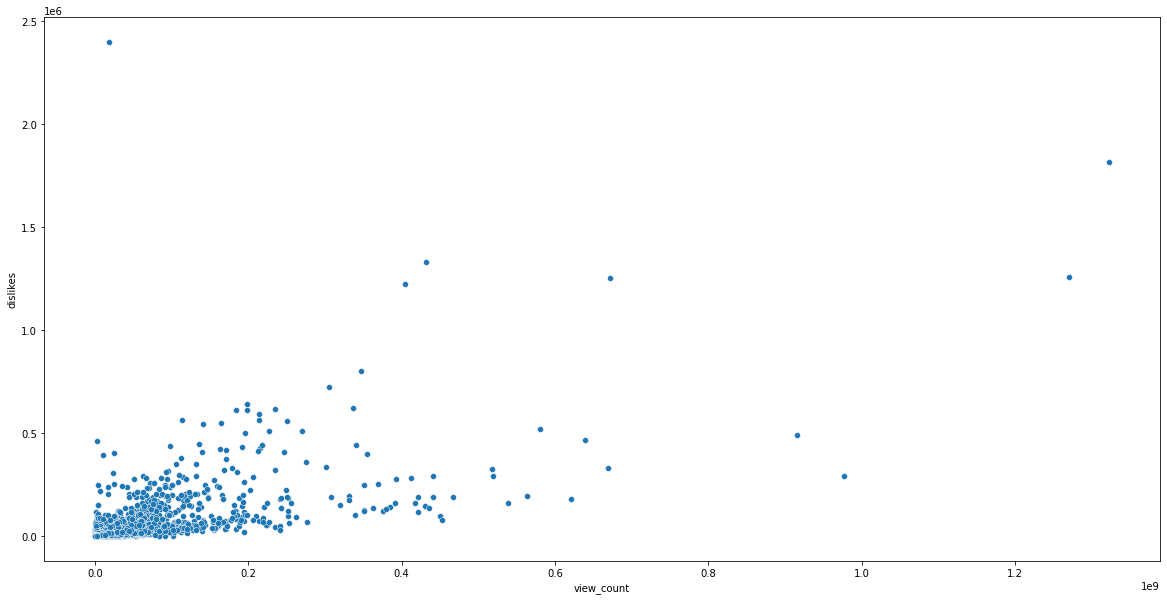

In [164]:
plt.figure(figsize=(20,10))
sns.scatterplot(x=df['view_count'],y=df['dislikes'])

From the above graph,we could see most of the videos have similar number of view counts and as the views of an videos increases,the number of dislikes is also increasing gradually .Also,there are certain exceptions like one point which represents an video having minimum number of views but maximum number of dislikes.

# Information of videos published in January and the number of videos published in January

In [166]:
dfjan=df[df['published_month']=='Jan']
dfjan

,video_id,title,channel_id,channel_title,published_at,view_count,likes,dislikes,comment_count,tags,description,comments,published_month
27,-2Gwm7QfBnE,Q&A With Naisha,UCYwNMbogQFzMccPSuy-pPWg,MianTwins,2021-01-21 00:05:47,872372,38626,239,621,,Hey Guys!!! this has been the most requested v...,I feel like Nate and Aishas personality match ...,Jan
48,-4sfXSHSxzA,SURPRISING BRENT WITH HIS TIKTOK CRUSH!!,UCPpATKqmMV-CNRNWYaDUwiA,Alexa Rivera,2021-01-16 21:40:04,6504784,262477,5779,7907,,He had no idea! Thank you guys so much for wat...,Thank you guys for watching and don't forget t...,Jan
95,-AJD1Fc5rpQ,WE ARE HAVING A BABY! | finding out i'm pregna...,UCVsTboAhpnuL6j-tDePvNwQ,Tess Christine,2021-01-03 21:53:48,533084,38965,119,1650,,I am so happy to tell you that I am pregnant!!...,Okay I needed a moment to collect my thoughts ...,Jan
103,-AuJiwjsmWk,Do Ugly Foods Taste Worse? Taste Test,UCzpCc5n9hqiVC7HhPwcIKEg,Good Mythical MORE,2021-01-19 11:00:01,1057077,22526,531,773,gmm good mythical morning rhettandlink rhett a...,"Today, we're doing a blind taste test to deter...","""there's nothing wrong with it being bent""\nI ...",Jan
182,-JhqO2KWr5U,Schlatt gets fit,UCWZp4y1jqBuvLtiyxSs_ZBw,Big guy,2021-01-24 22:50:57,1724965,119431,325,1578,jschlatt big guy jschlatt highlights schlatt j...,#jschlatt #schlatt #bigguy #short,Schlatt is single handedly wiping out all the ...,Jan
...,...,...,...,...,...,...,...,...,...,...,...,...,...
37300,zmzFL5bG-jc,DEVINE MON PERSONNAGE AVANT AKINATOR ! (c'est ...,UCIlr3byh6wmXgcPx_Tm9Ocw,Piwerre,2021-01-16 16:12:19,670357,54462,832,1249,Piwerre frere de michou crouton among us devin...,Discord Piwerre : https://discord.gg/QBduPgAA...,Mdr michou quand c'est pas ses tournage il fou...,Jan
37329,zpzjex7qwrA,Lampard Sacked Within Days Rorys Misery | Chel...,UCkD-ZOixI0a9FjIExDsHsbg,The Kick Off,2021-01-03 20:13:49,428646,12060,296,1505,Premier league Chelsea chelsea 1-3 Man City Ch...,The Kick Off watched Manchester City destroy C...,True Its like a fighter who Geordie But I thou...,Jan
37345,zqyv-B6mnBM,Lil Wayne - Ain't Got Time (Audio),UCO9zJy7HWrIS3ojB4Lr7Yqw,Lil Wayne,2021-01-21 05:00:10,2238244,58925,2365,5539,lil wayne weezy weezy wednesday wayne carter y...,"Official audio for Lil Wayne ""Ain't Got Time"",...","RIP Juice Wrld, wrote that on two cups, pour o...",Jan
37383,zwfu1-24T7Q,PRADA Cup Day 1 | Full Race Replay | PRADA Cup...,UCo15ZYO_XDRU9LI30OPtxAg,America's Cup,2021-01-15 04:07:55,317382,2008,83,192,America's Cup Americas Cup AC36 AC75 Presented...,"The opening day of the PRADA Cup in Auckland, ...",Incredible how these boats evolve in a short t...,Jan


In [168]:
dfjan.describe().apply(lambda s:s.apply('{:.5f}'.format))

,view_count,likes,dislikes,comment_count
count,2108.00000,2108.00000,2108.00000,2108.00000
mean,4976448.62761,131502.99431,3614.56831,8923.38520
std,20553308.43184,388688.73164,13946.71133,36646.61732
min,28450.00000,28.00000,3.00000,0.00000
25%,432233.50000,10324.00000,249.00000,874.75000
50%,1147499.50000,31739.00000,729.00000,2328.50000
75%,3227483.25000,107651.25000,2243.25000,6302.00000
max,620327393.00000,7828036.00000,409144.00000,1095119.00000


In [170]:
dfjan.describe(include='O')

,video_id,title,channel_id,channel_title,tags,description,comments,published_month
count,2108,2108,2108,2108,2108,2108,2108,2108
unique,2108,2106,1436,1433,1814,2051,2100,1
top,-2Gwm7QfBnE,YouTuber,UCNAf1k0yIjyGu3k9BwAg3lg,Sky Sports Football,,,No comments,Jan
freq,1,2,49,49,169,22,9,2108


In [171]:
dfjan.head()

,video_id,title,channel_id,channel_title,published_at,view_count,likes,dislikes,comment_count,tags,description,comments,published_month
27,-2Gwm7QfBnE,Q&A With Naisha,UCYwNMbogQFzMccPSuy-pPWg,MianTwins,2021-01-21 00:05:47,872372,38626,239,621,,Hey Guys!!! this has been the most requested v...,I feel like Nate and Aishas personality match ...,Jan
48,-4sfXSHSxzA,SURPRISING BRENT WITH HIS TIKTOK CRUSH!!,UCPpATKqmMV-CNRNWYaDUwiA,Alexa Rivera,2021-01-16 21:40:04,6504784,262477,5779,7907,,He had no idea! Thank you guys so much for wat...,Thank you guys for watching and don't forget t...,Jan
95,-AJD1Fc5rpQ,WE ARE HAVING A BABY! | finding out i'm pregna...,UCVsTboAhpnuL6j-tDePvNwQ,Tess Christine,2021-01-03 21:53:48,533084,38965,119,1650,,I am so happy to tell you that I am pregnant!!...,Okay I needed a moment to collect my thoughts ...,Jan
103,-AuJiwjsmWk,Do Ugly Foods Taste Worse? Taste Test,UCzpCc5n9hqiVC7HhPwcIKEg,Good Mythical MORE,2021-01-19 11:00:01,1057077,22526,531,773,gmm good mythical morning rhettandlink rhett a...,"Today, we're doing a blind taste test to deter...","""there's nothing wrong with it being bent""\nI ...",Jan
182,-JhqO2KWr5U,Schlatt gets fit,UCWZp4y1jqBuvLtiyxSs_ZBw,Big guy,2021-01-24 22:50:57,1724965,119431,325,1578,jschlatt big guy jschlatt highlights schlatt j...,#jschlatt #schlatt #bigguy #short,Schlatt is single handedly wiping out all the ...,Jan


In [172]:
dfjan.tail()

,video_id,title,channel_id,channel_title,published_at,view_count,likes,dislikes,comment_count,tags,description,comments,published_month
37300,zmzFL5bG-jc,DEVINE MON PERSONNAGE AVANT AKINATOR ! (c'est ...,UCIlr3byh6wmXgcPx_Tm9Ocw,Piwerre,2021-01-16 16:12:19,670357,54462,832,1249,Piwerre frere de michou crouton among us devin...,Discord Piwerre : https://discord.gg/QBduPgAA...,Mdr michou quand c'est pas ses tournage il fou...,Jan
37329,zpzjex7qwrA,Lampard Sacked Within Days Rorys Misery | Chel...,UCkD-ZOixI0a9FjIExDsHsbg,The Kick Off,2021-01-03 20:13:49,428646,12060,296,1505,Premier league Chelsea chelsea 1-3 Man City Ch...,The Kick Off watched Manchester City destroy C...,True Its like a fighter who Geordie But I thou...,Jan
37345,zqyv-B6mnBM,Lil Wayne - Ain't Got Time (Audio),UCO9zJy7HWrIS3ojB4Lr7Yqw,Lil Wayne,2021-01-21 05:00:10,2238244,58925,2365,5539,lil wayne weezy weezy wednesday wayne carter y...,"Official audio for Lil Wayne ""Ain't Got Time"",...","RIP Juice Wrld, wrote that on two cups, pour o...",Jan
37383,zwfu1-24T7Q,PRADA Cup Day 1 | Full Race Replay | PRADA Cup...,UCo15ZYO_XDRU9LI30OPtxAg,America's Cup,2021-01-15 04:07:55,317382,2008,83,192,America's Cup Americas Cup AC36 AC75 Presented...,"The opening day of the PRADA Cup in Auckland, ...",Incredible how these boats evolve in a short t...,Jan
37418,zziBybeSAtw,PELICANS at LAKERS | FULL GAME HIGHLIGHTS | Ja...,UCWJ2lWNubArHWmf3FIHbfcQ,NBA,2021-01-16 05:39:05,2841917,20759,1049,2624,NBA G League Basketball game-0022000187 Lakers...,PELICANS at LAKERS | FULL GAME HIGHLIGHTS | Ja...,Montrezl Harrell is going crazy with the rebou...,Jan


In [176]:
dfjan.shape

(2108, 13)

In [180]:
df['published_month'].value_counts()

Oct     4991
Sept    4880
Nov     4851
Aug     4262
Dec     3072
July    2340
Jun     2316
Mar     2258
Feb     2137
Apr     2126
Jan     2108
May     2081
Name: published_month, dtype: int64

In [181]:
df['published_month'].value_counts()['Jan']

2108

The number of videos published in the month of January is 2108.

# End